In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import nxviz as nv
from urllib.request import urlopen
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20

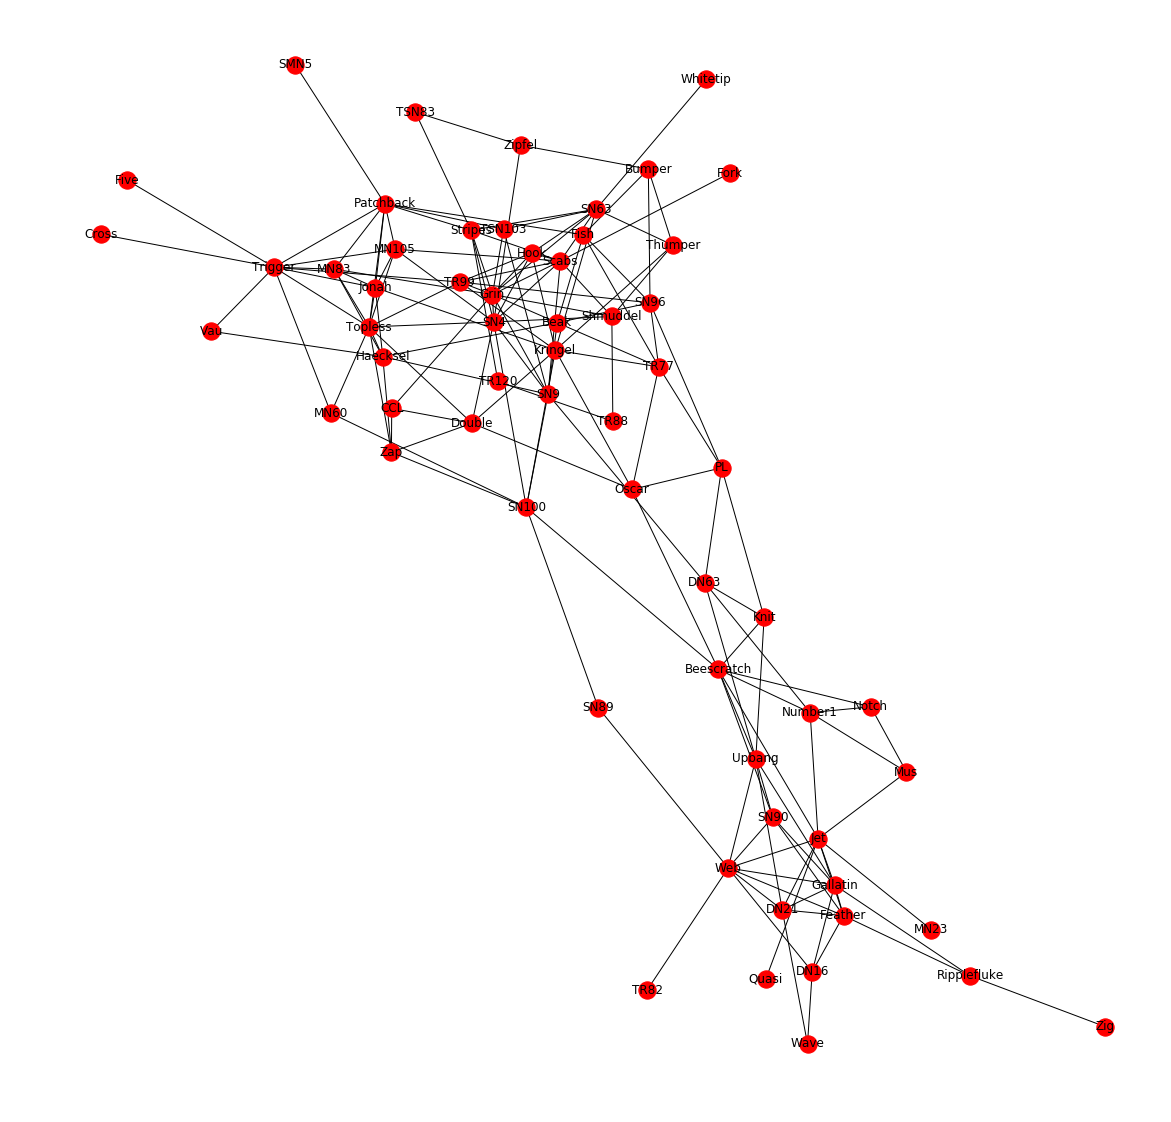

In [22]:
D = nx.read_gml('dolphins.gml')
nx.draw_networkx(D)
plt.axis('off');

There is a clear connection between all of the dolphins in the group. A group of them are clustered together on the right side of this graph, and the rest are a bit more spread. Many have only one edge -- perhaps these are infant or juvenile dolphins who have not yet had the opportunity to develop relationships within the pod. 

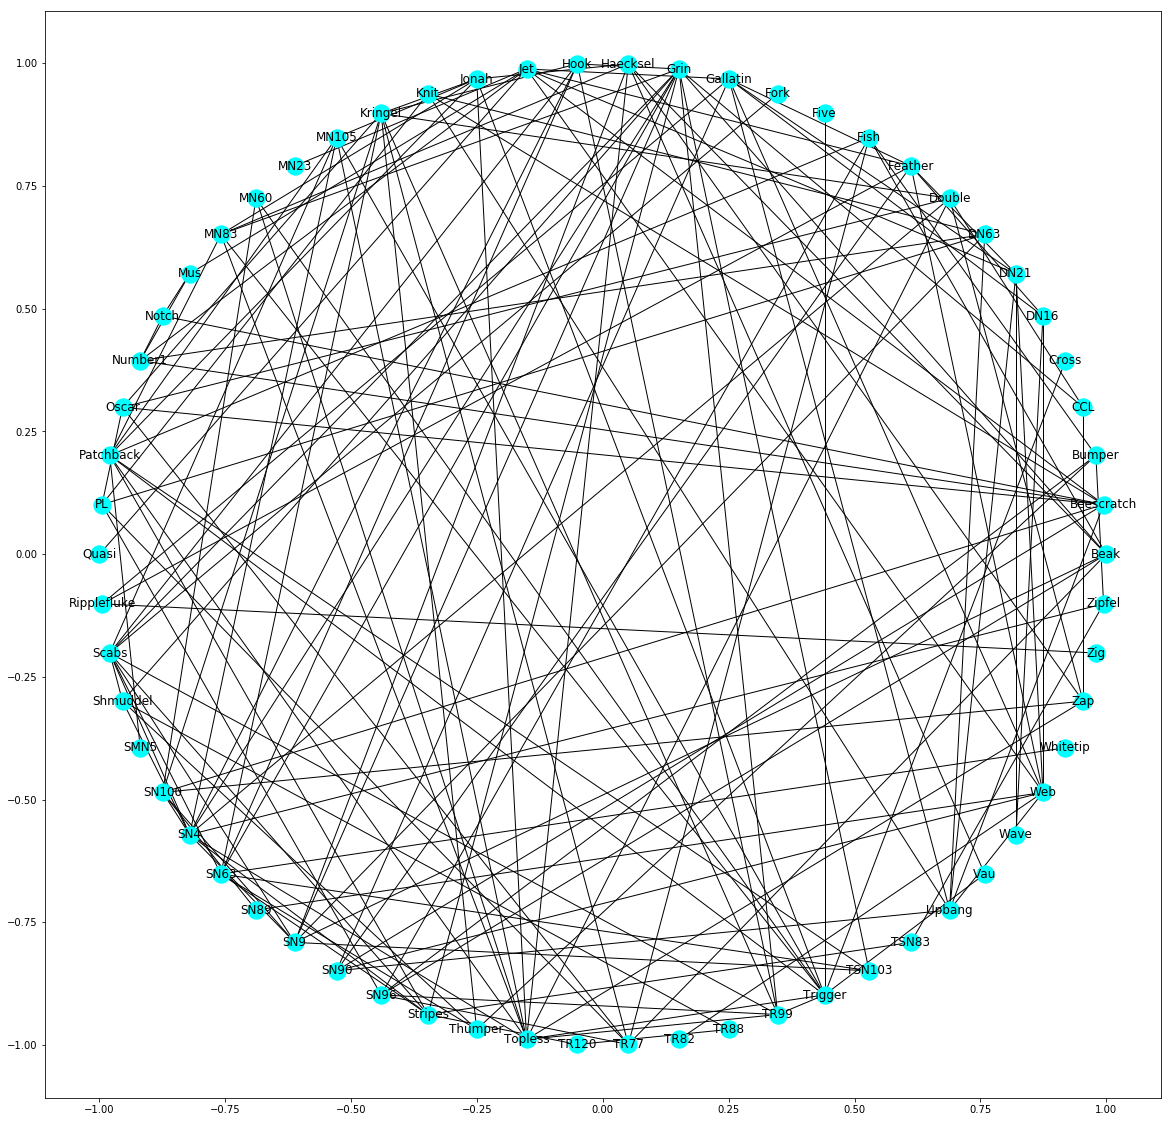

In [23]:
nx.draw_networkx(D, 
                pos=nx.circular_layout(D), 
                node_color='cyan'
                )

For this dataset, interpretion of a circular layout is much less clear than that of the spring layout. At a quick glance, it is very unclear which dolphins have the most relationships, and almost impossible to see how many dolphins have only one relationship, compared to the spring layout above. 

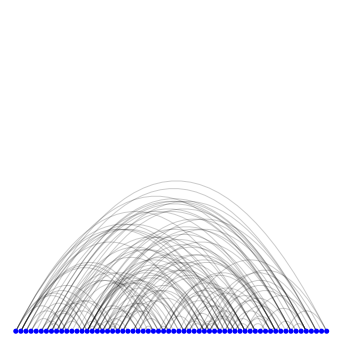

In [4]:
ap = nv.ArcPlot(D)
ap.draw()
plt.show()

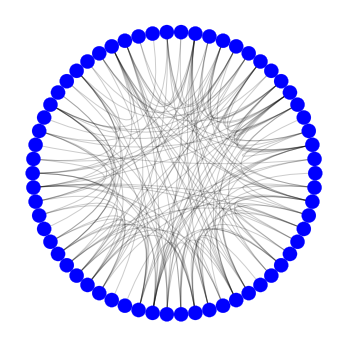

In [5]:
from nxviz import CircosPlot
# Create the CircosPlot object: c
c = CircosPlot(D)
c.draw()
plt.show()

The nxviz plots are less cluttered than the standard Networkx versions, but it is still hard to glean what might be going on here. 

In [6]:
#Various summary statistics

sum_stats = nx.info(D)
print(sum_stats)
print('Density: ' + str(nx.density(D)))
print('Average Clustering: ' + str(nx.average_clustering(D)))
print('Average shortest path length: ' + str(nx.average_shortest_path_length(D)))

Name: 
Type: Graph
Number of nodes: 62
Number of edges: 159
Average degree:   5.1290
Density: 0.08408249603384453
Average Clustering: 0.2589582460550202
Average shortest path length: 3.3569539925965097


In [7]:
#Create a Pandas Dataframe of the node data

nodes = pd.DataFrame()

dc = nx.degree_centrality(D)
bc = nx.betweenness_centrality(D)
cc = nx.closeness_centrality(D)
pr = nx.pagerank(D)
degs = dict(D.degree)

deg_cent = list(dc.values())
bet_cent = list(bc.values())
close_cent = list(bc.values())
page_rank = list(pr.values())
degs = list(degs.values())
names = list(D.nodes())

nodes['name'] = names
nodes['degs'] = degs
nodes['deg_frac'] = deg_cent
nodes['bet_cent'] = bet_cent
nodes['close_cent'] = close_cent
nodes['page_rank'] = page_rank

nodes[:5]

,name,degs,deg_frac,bet_cent,close_cent,page_rank
0,Beak,6,0.098361,0.019083,0.019083,0.016962
1,Beescratch,8,0.131148,0.213324,0.213324,0.024658
2,Bumper,4,0.065574,0.009073,0.009073,0.013336
3,CCL,3,0.049180,0.002374,0.002374,0.009627
4,Cross,1,0.016393,0.000000,0.000000,0.005079


In [8]:
nodes.describe()

,degs,deg_frac,bet_cent,close_cent,page_rank
count,62.000000,62.000000,62.000000,62.000000,62.000000
mean,5.129032,0.084082,0.039283,0.039283,0.016129
std,2.955871,0.048457,0.050965,0.050965,0.007833
min,1.000000,0.016393,0.000000,0.000000,0.004835
25%,3.000000,0.049180,0.003083,0.003083,0.009686
50%,5.000000,0.081967,0.021630,0.021630,0.015781
75%,7.000000,0.114754,0.056086,0.056086,0.021398
max,12.000000,0.196721,0.248237,0.248237,0.032137


In [9]:
#Sort by betweenness centrality

nodes.sort_values(by=['bet_cent'], ascending=False)[:5]

,name,degs,deg_frac,bet_cent,close_cent,page_rank
36,SN100,7,0.114754,0.248237,0.248237,0.020612
1,Beescratch,8,0.131148,0.213324,0.213324,0.024658
40,SN9,8,0.131148,0.143150,0.143150,0.021963
37,SN4,11,0.180328,0.138570,0.138570,0.029869
7,DN63,5,0.081967,0.118239,0.118239,0.015646


In [10]:
#Add a column of degree bins by quartile. 
#Dolphins in the highest quartile of degree centrality are assigned to bin 4, lowest to bin 1.

def split_num(x):
    if x < 3.1:
         return 1
    elif x < 5.1:
        return 2
    elif x < 7.1:
        return 3
    else:
         return 4
nodes['deg_bin'] =  nodes['degs'].apply(split_num)
nodes[:5]

,name,degs,deg_frac,bet_cent,close_cent,page_rank,deg_bin
0,Beak,6,0.098361,0.019083,0.019083,0.016962,3
1,Beescratch,8,0.131148,0.213324,0.213324,0.024658,4
2,Bumper,4,0.065574,0.009073,0.009073,0.013336,2
3,CCL,3,0.049180,0.002374,0.002374,0.009627,1
4,Cross,1,0.016393,0.000000,0.000000,0.005079,1


In [11]:
#Add data from dataframe to node attributes using built-in Networkx methods

D_bet_cent = nx.betweenness_centrality(D)
#isinstance(D_bet_cent, dict)
nx.set_node_attributes(D, D_bet_cent, 'bet_cent')

D_deg_cent = nx.degree_centrality(D)
nx.set_node_attributes(D, D_deg_cent, 'deg_cent')

D_close_cent = nx.closeness_centrality(D)
nx.set_node_attributes(D, D_close_cent, 'close_cent')

#nx.set_node_attributes(D, nodes.deg_bin, 'deg_bin')

D.add_node('Beak', deg_bin=3)
D.add_node('Beescratch', deg_bin=4)
D.add_node('Bumper', deg_bin=2)
D.add_node('CCL', deg_bin=1)
D.add_node('Cross', deg_bin=1)
D.add_node('DN16', deg_bin=2)
D.add_node('DN21', deg_bin=3)
D.add_node('DN63', deg_bin=2)
D.add_node('Double', deg_bin=3)
D.add_node('Feather', deg_bin=3)

D.add_node('Fish', deg_bin=2)
D.add_node('Five', deg_bin=1)
D.add_node('Fork', deg_bin=1)
D.add_node('Gallatin', deg_bin=4)
D.add_node('Grin', deg_bin=4)
D.add_node('Haecksel', deg_bin=3)
D.add_node('Hook', deg_bin=3)
D.add_node('Jet', deg_bin=4)
D.add_node('Jonah', deg_bin=3)
D.add_node('Knit', deg_bin=2)

D.add_node('Kringel', deg_bin=4)
D.add_node('MN105', deg_bin=3)
D.add_node('MN23', deg_bin=1)
D.add_node('MN60', deg_bin=1)
D.add_node('MN83', deg_bin=3)
D.add_node('Mus', deg_bin=1)
D.add_node('Notch', deg_bin=1)
D.add_node('Number1', deg_bin=2)
D.add_node('Oscar', deg_bin=2)
D.add_node('Patchback', deg_bin=4)

D.add_node('PL', deg_bin=2)
D.add_node('Quasi', deg_bin=1)
D.add_node('Ripplefluke', deg_bin=1)
D.add_node('Scabs', deg_bin=4)
D.add_node('Shmuddel', deg_bin=2)
D.add_node('SMN5', deg_bin=1)
D.add_node('SN100', deg_bin=3)
D.add_node('SN4', deg_bin=4)
D.add_node('SN63', deg_bin=4)
D.add_node('SN89', deg_bin=1)

D.add_node('SN9', deg_bin=4)
D.add_node('SN90', deg_bin=2)
D.add_node('SN96', deg_bin=3)
D.add_node('Stripes', deg_bin=3)
D.add_node('Thumper', deg_bin=2)
D.add_node('Topless', deg_bin=4)
D.add_node('TR120', deg_bin=1)
D.add_node('TR77', deg_bin=3)
D.add_node('TR82', deg_bin=1)
D.add_node('TR88', deg_bin=1)

D.add_node('TR99', deg_bin=3)
D.add_node('Trigger', deg_bin=4)
D.add_node('TSN103', deg_bin=2)
D.add_node('TSN83', deg_bin=1)
D.add_node('Upbang', deg_bin=3)
D.add_node('Vau', deg_bin=1)
D.add_node('Wave', deg_bin=1)
D.add_node('Web', deg_bin=4)
D.add_node('Whitetip', deg_bin=1)
D.add_node('Zap', deg_bin=2)

D.add_node('Zig', deg_bin=1)
D.add_node('Zipfel', deg_bin=1)

D.nodes['Bumper']


{'bet_cent': 0.00907281243346817,
 'close_cent': 0.2824074074074074,
 'deg_bin': 2,
 'deg_cent': 0.06557377049180328}

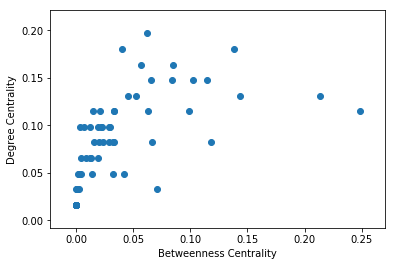

In [12]:
# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(x=list(D_bet_cent.values()), y=list(D_deg_cent.values()))
plt.xlabel('Betweenness Centrality')
plt.ylabel('Degree Centrality')

# Display the plot
plt.show()

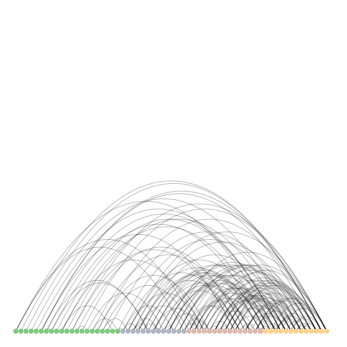

In [13]:
a2 = nv.ArcPlot(D, node_order='deg_bin', node_color='deg_bin')
a2.draw();

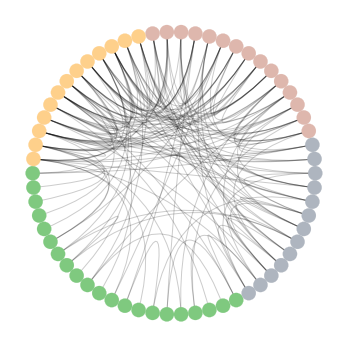

In [14]:
c2 = nv.CircosPlot(D, node_order='deg_bin', node_color='deg_bin')
c2.draw();

In [15]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)
    
    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))
    
    nodes = set()
    
    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():
    
        # Check if the current value has the maximum degree centrality
        if v == max_dc:
        
            # Add the current node to the set of nodes
            nodes.add(k)
            
    return nodes
    
# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(D)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(D)[node] == max(nx.degree_centrality(D).values())

{'Grin'}


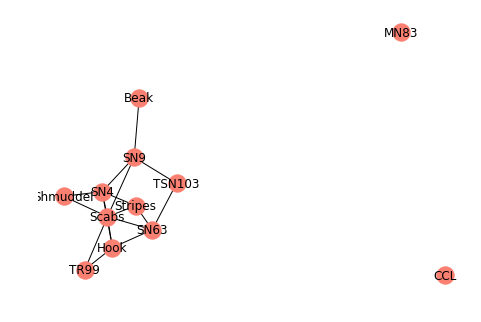

<Figure size 720x720 with 0 Axes>

In [16]:
#'Grin' is the dolphin with the highest degree centrality. Let's look at his ego graph.

ego_GN = nx.ego_graph(D, 'Grin', radius=1, center=False)
nx.draw(ego_GN, 
        node_color='salmon', 
        with_labels=True);

plt.figure(figsize=(10, 10));


In [17]:
SN_sum_stats = nx.info(ego_GN)
print(SN_sum_stats)

Name: 
Type: Graph
Number of nodes: 12
Number of edges: 17
Average degree:   2.8333


In [18]:
#View the cliques. There are three cliques of five dolphins, two of them identical except for on individual. 

allclq = nx.enumerate_all_cliques(D)
[print(n) for n in allclq]

['Beak']
['Beescratch']
['Bumper']
['CCL']
['Cross']
['DN16']
['DN21']
['DN63']
['Double']
['Feather']
['Fish']
['Five']
['Fork']
['Gallatin']
['Grin']
['Haecksel']
['Hook']
['Jet']
['Jonah']
['Knit']
['Kringel']
['MN105']
['MN23']
['MN60']
['MN83']
['Mus']
['Notch']
['Number1']
['Oscar']
['Patchback']
['PL']
['Quasi']
['Ripplefluke']
['Scabs']
['Shmuddel']
['SMN5']
['SN100']
['SN4']
['SN63']
['SN89']
['SN9']
['SN90']
['SN96']
['Stripes']
['Thumper']
['Topless']
['TR120']
['TR77']
['TR82']
['TR88']
['TR99']
['Trigger']
['TSN103']
['TSN83']
['Upbang']
['Vau']
['Wave']
['Web']
['Whitetip']
['Zap']
['Zig']
['Zipfel']
['Beak', 'Fish']
['Beak', 'Grin']
['Beak', 'Haecksel']
['Beak', 'SN9']
['Beak', 'SN96']
['Beak', 'TR77']
['Beescratch', 'Jet']
['Beescratch', 'Knit']
['Beescratch', 'Notch']
['Beescratch', 'Number1']
['Beescratch', 'Oscar']
['Beescratch', 'SN100']
['Beescratch', 'SN90']
['Beescratch', 'Upbang']
['Bumper', 'Fish']
['Bumper', 'SN96']
['Bumper', 'Thumper']
['Bumper', 'Zipfel']
[

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [19]:
#View the communities of dolphins. There are two large communities of 21 and 18 dolphins, respectively. 
#There are two medium-sized communities of 12 and 7 dolphins, and two communities of just two dolphins. 

from networkx.algorithms import community

commD = community.label_propagation_communities(D)
list(commD)

[{'TR120', 'TR88'},
 {'Beak', 'Bumper', 'Fish', 'Oscar', 'PL', 'SN96', 'TR77'},
 {'Fork',
  'Grin',
  'Hook',
  'Kringel',
  'SN63',
  'Scabs',
  'Shmuddel',
  'Stripes',
  'TR99',
  'TSN103',
  'Thumper',
  'Whitetip'},
 {'TSN83', 'Zipfel'},
 {'Beescratch',
  'DN16',
  'DN21',
  'DN63',
  'Feather',
  'Gallatin',
  'Jet',
  'Knit',
  'MN23',
  'Mus',
  'Notch',
  'Number1',
  'Quasi',
  'Ripplefluke',
  'SN89',
  'SN90',
  'TR82',
  'Upbang',
  'Wave',
  'Web',
  'Zig'},
 {'CCL',
  'Cross',
  'Double',
  'Five',
  'Haecksel',
  'Jonah',
  'MN105',
  'MN60',
  'MN83',
  'Patchback',
  'SMN5',
  'SN100',
  'SN4',
  'SN9',
  'Topless',
  'Trigger',
  'Vau',
  'Zap'}]